<a href="https://colab.research.google.com/github/NihilisticMotif/Data-Science-Documentation/blob/main/Data-Science-Documentation/Mathematics/Statistics/ProbabilityDistributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###To Do Now
* Describe all types of ProbabilityDistributions in https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

###To Do Now:
1. read this https://www.analyticsvidhya.com/blog/2021/09/maximum-likelihood-estimation-a-comprehensive-guide/ and identify how this post relate to kl divergence
2. compute MLE of normal distribution function and linear models
3. Compare Gradient Descent and MLE (https://stats.stackexchange.com/questions/183871/what-is-the-difference-between-maximum-likelihood-estimation-gradient-descent)

#Get Data

###Dataset No.1

In [1]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path='/content/drive/MyDrive/Data-Science-Documentation/DataSet/K_RealEstate01_ArslanAli.csv'
'''
Source of the example data set: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset
'''
df = pd.read_csv(path)
df.astype(float)

Mounted at /content/drive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


###Dataset No.2

#Normal Distribution

###Standard Deviation

**What is Standard Deviation?**

* A standard deviation (or σ) = a measure of how dispersed the data is in relation to the mean. 
* Low standard deviation = data are clustered around the mean
* High standard deviation = data are more spread out. 

(https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod8_sd.html)

**Standard Deviation Formula**

$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$

* $s=$ Standard Deviation $\geq0$
* $n=$ number of all data points.
* $\overline{x}=\sum_{i=1}^n\frac{x_i}{n}$

**The Difference Between Variance And Standard Deviation**
* Variance = $\text{Standard Deviation}^2=s^2$
* reference: https://byjus.com/maths/difference-between-variance-and-standard-deviation/

**The Difference Between Population and sample standard deviation**
* If the data is being considered a population on its own $\implies s = \text{Population standard deviation} = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}}$
* If the data is a sample from a larger population, $\implies s = \text{Sample standard deviation} = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$
* reference: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

In [2]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

name=df.columns[1]

print('s = '+str(StandardDeviation(df[name])))

s = 23.21209257197624


###Probability Distribution Function

**The relationship between Standard Deviation and bell curve (Probability Distribution Function)**

$P(x)=\frac{\exp{((-\frac{1}{2})*(\frac{x-\overline{x}}{s})^2)}}{s\sqrt{2\pi}}=\frac{1}{s\sqrt{2\pi}}*e^{(-\frac{1}{2})*(\frac{x-\overline{x}}{s})^2}$

* $s=$ Standard Deviation $\geq0$
* $n=$ number of all data points.
* $\overline{x}=\sum_{i=1}^n\frac{x_i}{n}$

**Properties of Probability Distribution Function**
* $P(x)\in(0,\infty]$
* domain of $P(x)=x\in[-\infty,\infty]$
* the total area under the curves of $P(x)=1$

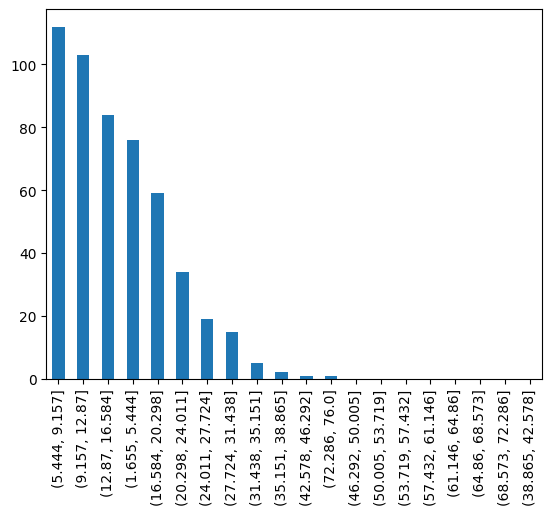

(5.444, 9.157]      112
(9.157, 12.87]      103
(12.87, 16.584]      84
(1.655, 5.444]       76
(16.584, 20.298]     59
(20.298, 24.011]     34
(24.011, 27.724]     19
(27.724, 31.438]     15
(31.438, 35.151]      5
(35.151, 38.865]      2
(42.578, 46.292]      1
(72.286, 76.0]        1
(46.292, 50.005]      0
(50.005, 53.719]      0
(53.719, 57.432]      0
(57.432, 61.146]      0
(61.146, 64.86]       0
(64.86, 68.573]       0
(68.573, 72.286]      0
(38.865, 42.578]      0
Name: LSTAT, dtype: int64


In [3]:
# This code count the frequency of value
# x axis = value (value of the data)
# y axis = fequency (how often the data have the same value)

space=20
name=df.columns[-2]
df[name].value_counts(bins=space)

fig, ax = plt.subplots()
df[name].value_counts(bins=space).plot(ax=ax, kind='bar')
plt.show()
dflist=df[name].value_counts(bins=space)#.index#.tolist()
print((dflist))#.left))

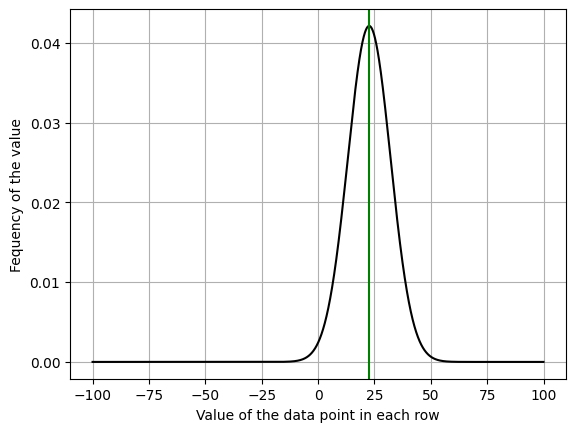

In [4]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

name=df.columns[-1]
fx=BellCurve(df[name])

plt.plot(fx[0],fx[1],color='black')
#plt.axvline(df[name].mean()-0.675*StandardDeviation(df[name]),color='red') # reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
plt.axvline(df[name].mean(),color='green')
#plt.axvline(df[name].mean()+0.675*StandardDeviation(df[name]),color='blue') # reference: https://www.statology.org/find-quartiles-with-mean-standard-deviation/
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

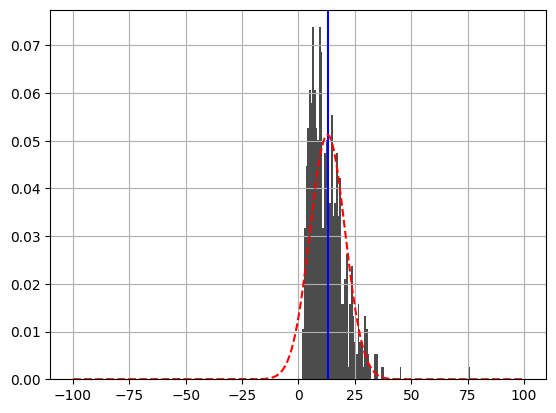

In [5]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

name=df.columns[-2]
fx=BellCurve(df[name])
fig, ax = plt.subplots()
space=10

bins = 100
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black', 
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

plt.axvline(df[name].mean(),color='blue')
ax.plot(fx[0],fx[1], '--',color='red')
plt.grid()
plt.show()

**This is how `density=1` works in ax.hist**

Histogram Graph = $f(x)=h_x$
* $h_x=$ height of the histogram in the respect of input $x$
* $w=$ width of the histogram
* Area under the histogram = $ \int f(x) \text{dx} = \Sigma_{i=1}^nh_iw$

When `density=0`
* Nothing is change.

When `density=1`
* `ax.hist` will modify $ \int f(x) \text{dx} = 1$ in order to make comparison between Normal distribution and $f(x)$ becomes easy.

In [6]:
# This is how density=1 works in ax.hist
# density = BinHeight / (100 * NumberOfAllBin * BinWidth)
# \therefore density dx = (np.sum(density * BinWidth) == 1)
# reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

name=df.columns[-2]
binn=100

Frequency=df[name].value_counts(bins=binn).tolist()
Start=list(df[name].value_counts(bins=binn).index.left)
End=list(df[name].value_counts(bins=binn).index.right)
NumberOfAllBin=df[name].shape[0]
BinWidth=((End[0]-Start[0])/binn)

df01 = pd.DataFrame({'density=0':[], 'density=1':[]})

for i in range(len(Frequency)):
  df01=df01.append(
      pd.DataFrame(
          {'density=0':[Frequency[i]],
           'density=1':[Frequency[i]/(100*NumberOfAllBin*BinWidth)]}),  # this column is approximately equal to n
           #   density = BinHeight / (100 * NumberOfAllBin * BinWidth)
           ignore_index = True)

print('df01')
print(df01)

'''
# In order to plot this graph properly, you must sort [Start,End] pair and re order Frequency in its correct order.
'''

df01
    density=0  density=1
0        28.0   0.073748
1        28.0   0.073748
2        26.0   0.068480
3        23.0   0.060578
4        23.0   0.060578
..        ...        ...
95        0.0   0.000000
96        0.0   0.000000
97        0.0   0.000000
98        0.0   0.000000
99        0.0   0.000000

[100 rows x 2 columns]


<ipython-input-6-a1f05bcc03c7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-6-a1f05bcc03c7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-6-a1f05bcc03c7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-6-a1f05bcc03c7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-6-a1f05bcc03c7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(
<ipython-input-6-a1f05bcc03c7>:18: FutureWarning: The frame.

'\n# In order to plot this graph properly, you must sort [Start,End] pair and re order Frequency in its correct order.\n'

In [7]:
print(n)

[0.01053964 0.03161891 0.04479346 0.05269819 0.06060291 0.05796801
 0.07377746 0.06060291 0.05269819 0.05006328 0.07377746 0.06850764
 0.03161891 0.04742837 0.05006328 0.05796801 0.03688873 0.0553331
 0.03425382 0.03688873 0.04742837 0.03425382 0.04215855 0.01580946
 0.01580946 0.02107927 0.02634909 0.00263491 0.01580946 0.02371418
 0.01317455 0.00790473 0.00526982 0.01580946 0.00790473 0.00790473
 0.00263491 0.01317455 0.01053964 0.00526982 0.00263491 0.
 0.         0.00526982 0.00526982 0.         0.         0.00263491
 0.00263491 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00263491 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 

**Why does increasing the standard deviation of a normal distribution result in a flatter curve?**
* the total area under the curves of Probability Distribution Function (PDF) has to be equal to 1.
* Standard deviation = a measure of dispersion. 
* That means the larger the standard deviation the more ‘dispersed’ or “spread out” the values of the variable are around the mean. This means that more values will be found farther away from the mean and that the probability of an value is higher. This flattens the curve.

reference: 
* https://www.quora.com/Why-does-increasing-the-standard-deviation-of-a-normal-distribution-result-in-a-flatter-curve
* https://qr.ae/prlYKv

**Area = 1**

In [8]:
import scipy as sp
import sympy as smp

#f1 = smp.Function('f1')
#f2 = smp.Function('f2')
x = smp.symbols('x', real=True)

truemean=df[name].mean()
truestd=df[name].std()

falsemean=5#*10**10

f1 = (smp.exp(-(((x-df[name].mean())/df[name].std())**2)/2))/(df[name].std()*(2*smp.pi)**(1/2))
f2 = (smp.exp(-(((x-falsemean)/df[name].std())**2)/2))/(df[name].std()*(2*smp.pi)**(1/2))
#f2 = (smp.exp(-(((x-falsemean)/truestd)**2)/2))/((truestd*2*smp.pi)**(1/2))

'''
erf(z)=error function(z)= \frac{2}{\pi^{1/2}}\int_{0}^{z}e^{-t^2}dt
erf(z) is the "error function" encountered in integrating the normal distribution (which is a normalized form of the Gaussian function).
# reference: https://mathworld.wolfram.com/Erf.html
# reference: https://youtu.be/2I44Y9hfQ4Q
'''

#print((smp.integrate(f1-f2, x)))
#print((smp.integrate(f1-f2, (x,-smp.oo,smp.oo))))
print((smp.integrate(f1, (x,-smp.oo,smp.oo))))

1.00000000000000


###[Unfinished]: Z score

**What is Z score (a.k.a. The standard score)?**

$Z=\frac{x-\overline{x}}{s}$

* $Z=$ Z score
* $Z=0\implies$ the score is equal to the mean.
* $Z>0\implies$ the score is above the mean.
* $Z<0\implies$ the score indicating it is below the mean.
* $\overline{x}=$ mean value of $x$
* $s=$ Standard Deviation

**Application of Z score**

* allows us to calculate the probability of a score occurring within our normal distribution
* enables us to compare two scores that are from different normal distributions.

reference: 
* https://www.investopedia.com/terms/z/zscore.asp#toc-how-the-z-score-is-used
* https://statistics.laerd.com/statistical-guides/standard-score.php

In [9]:
def ZScore(InputX,Data):
  Zs=(InputX-Data.mean())/StandardDeviation(Data)
  return Zs

name=df.columns[1]
print(ZScore(20,df[name]))

0.3768533056174269


**Reference:**
* https://youtu.be/1tDckAmNKE8

#[UNFINISHED]: Total variation

Reference:
* https://www.analyticsvidhya.com/blog/2021/09/maximum-likelihood-estimation-a-comprehensive-guide/

**Question**
* If the total variation is used for comparing 2 different probability distribution, is it suitable to use this algorithm to compare 2 Normal distribution?
* What is the intinution behind this formula:

$T^{\{V\}}(P^{\{1\}},P^{\{2\}})=\text{MAX}|P^{\{1\}}(X)-P^{\{2\}}(X)|,X⊆D$

$T^{\{V\}}(P^{\{1\}},P^{\{2\}})=\frac{1}{2}\int_{X\in D}P^{\{1\}}(x)-P^{\{2\}}(x)\,dx$

* Why integral and $\frac{1}{2}$?

**Keyword**
* Statistical distance quantifies the distance between two statistical objects, which can be two random variables, or two probability distributions or samples etc. (https://en.wikipedia.org/wiki/Statistical_distance)
* Distance is a numerical or occasionally qualitative measurement of how far apart objects or points are. (https://en.wikipedia.org/wiki/Distance)

**Input (observed) data - Hypothesis function data pair**

$(D,\{h(\vec{h}_n)\},\vec{h}_n\in R)$

or

$h(\vec{h}_n)\in D,\vec{h}_n\in R$

* $D=$ sample space, the range of values that our input data can take
* $R=$ the parameter space
* $h(\vec{h}_n)=$ hypothesis function
* $\vec{h}_n=$ parameters

**Total Variation (TV) Distance**

**TV formula**

TV is used for computing the farthest distance between two probability distributions.

$T^{\{V\}}(P^{\{1\}},P^{\{2\}})=\text{MAX}|P^{\{1\}}(X)-P^{\{2\}}(X)|,X⊆D$

$T^{\{V\}}(P^{\{1\}},P^{\{2\}})=\frac{1}{2}\int_{X\in D}P^{\{1\}}(x)-P^{\{2\}}(x)\,dx$

* $\text{MAX}|\Delta P(X)|=$ the maximum difference in their probabilities computed for any $X⊆D$. 
* $D=$ sample space, set of all possible data
* $X=$ set of all input data
* $P^{\{i\}}=$ distributions no.$i$
* $P^{\{i\}}(x)=$ probability of variable no.$i$ taking a value in $x$

**TV properties**
* $T^{\{V\}}(P^{\{1\}},P^{\{2\}})=T^{\{V\}}(P^{\{2\}},P^{\{1\}})$
* $T^{\{V\}}(P^{\{1\}},P^{\{2\}})=0\implies P^{\{1\}}=P^{\{2\}}$
* $T^{\{V\}}(P^{\{1\}},P^{\{2\}})\in [0,1]$
* $T^{\{V\}}(P,Q)\leq T^{\{V\}}(P,R)+T^{\{V\}}(R,Q)$

**Example No.1 with Normal Distributions**

Reference: https://math.stackexchange.com/questions/1022849/total-variation-distance-of-two-centered-normal-distributions

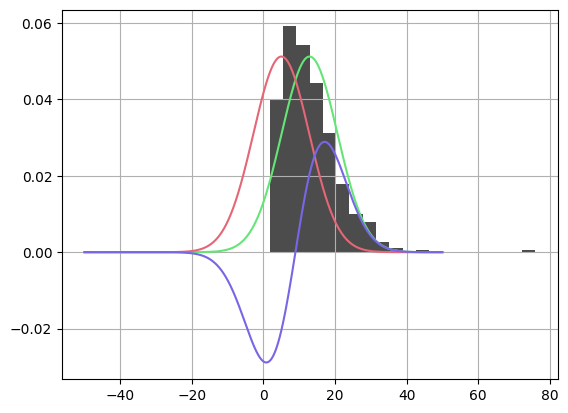

In [ ]:
def BellCurve(X1,P1,P2):
  mean=P1
  SD=P2
  return (np.exp(-(1/2)*pow((X1-mean)/SD,2)))/(math.sqrt(np.pi*2)*SD)

name=df.columns[-2]
fig, ax = plt.subplots()

bins = 20
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black', 
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

#plt.axvline(dfmain[name].mean(),color='blue')

Xline=np.arange(-50,50,0.01)

ax.plot(Xline,BellCurve(Xline,df[name].mean(),df[name].std()),color='#66E577') # GREEN
ax.plot(Xline,BellCurve(Xline,falsemean,df[name].std()),color='#E56677') # RED
ax.plot(Xline,BellCurve(Xline,df[name].mean(),df[name].std())-BellCurve(Xline,falsemean,df[name].std()),color='#7766E5') # PURPLE

plt.grid()
plt.show()

In [ ]:
Area1=np.trapz(BellCurve(Xline,df[name].mean(),df[name].std())) # GREEN
Area2=np.trapz(BellCurve(Xline,falsemean,df[name].std())) # RED
DeltaArea=np.trapz(BellCurve(Xline,df[name].mean(),df[name].std())-BellCurve(Xline,falsemean,df[name].std())) # PURPLE
print("Area1 ="+ str(Area1))
print("Area2 ="+ str(Area2))
print("DeltaArea ="+ str(DeltaArea))
# reference: https://stackoverflow.com/questions/13320262/calculating-the-area-under-a-curve-given-a-set-of-coordinates-without-knowing-t

Area1 =99.99990287981188
Area2 =99.99999960324432
DeltaArea =-9.672343244171433e-05


In [ ]:
import scipy as sp
import sympy as smp

#f1 = smp.Function('f1')
#f2 = smp.Function('f2')
x = smp.symbols('x', real=True)

truemean=df[name].mean()
truestd=df[name].std()

falsemean=5#*10**10

f1 = (smp.exp(-(((x-truemean)/truestd)**2)/2))/((truestd*2*smp.pi)**(1/2))
f2 = (smp.exp(-(((x-falsemean)/truestd)**2)/2))/((truestd*2*smp.pi)**(1/2))

'''
erf(z)=error function(z)= \frac{2}{\pi^{1/2}}\int_{0}^{z}e^{-t^2}dt
erf(z) is the "error function" encountered in integrating the normal distribution (which is a normalized form of the Gaussian function).
# reference: https://mathworld.wolfram.com/Erf.html
'''

print((smp.integrate(f2-f1, (x,-smp.oo,smp.oo))))

<class 'sympy.core.numbers.Float'>


In [ ]:
'''def TVDistance(inputX):
  x = smp.symbols('x', real=True)
  name=df.columns[-2]
  truemean=df[name].mean()
  truestd=df[name].std()
  f1 = (smp.exp(-(((x-truemean)/truestd)**2)/2))/((truestd*2*smp.pi)**(1/2))
  f2 = (smp.exp(-(((x-inputX)/truestd)**2)/2))/((truestd*2*smp.pi)**(1/2))
  return float(smp.integrate(f2-f1, (x,-smp.oo,smp.oo)))

Xline=np.arange(-50,50,0.01)
Yline=[]
for i in Xline:
  Yline.append(TVDistance(i))

ax.plot(Xline,np.array(Yline))
    
plt.grid()
plt.show()'''

KeyboardInterrupt: ignored

In [ ]:
print(len(Yline))

1444


In [ ]:
np.array(Yline)

array([-2.02060590e-14,  2.22044605e-16, -2.22044605e-16, ...,
       -9.54791801e-15, -6.66133815e-16,  9.99200722e-15])

In [ ]:
Xline=np.arange(1,1444,1)
Xline

array([   1,    2,    3, ..., 1441, 1442, 1443])

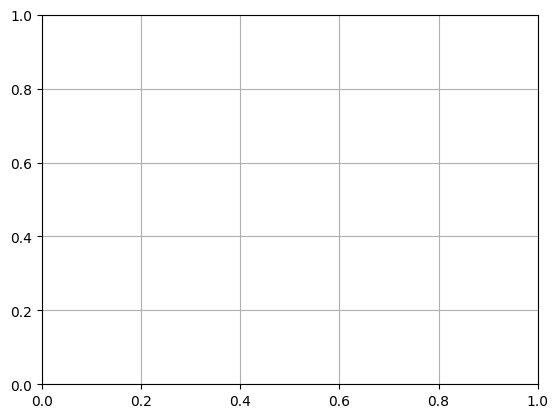

In [ ]:
Xline=np.arange(1,1445,1)
ax.plot(Xline,np.array(Yline),color='red')
plt.grid()
plt.show()

In [ ]:
'''
Xline=np.arange(-50,50,0.01)
Xspace=np.arange(-50,50,0.01)

DeltaArea=np.trapz(BellCurve(Xline,df[name].mean(),df[name].std())-BellCurve(Xline,Xspace,df[name].std())) # PURPLE
print(DeltaArea)'''

-411.58289508882785


#Kullback-Leibler Divergence

Reference:
* https://towardsdatascience.com/understanding-kl-divergence-f3ddc8dff254
* https://www.analyticsvidhya.com/blog/2021/09/maximum-likelihood-estimation-a-comprehensive-guide/
* https://youtu.be/9_eZHt2qJs4

###Notation

**Variable**
* $h=$ a parameter
* $h_n=\vec{h}_n=$ vector of parameters
* $\hat{h}=$ an approximated parameter (estimator)
* $h^*=$ true value of a parameter (estimator)
* $P=$ probability distribution
* $D=$ set of all possible value of a dataset (input)

**Function**

1. $E(\vec{X}_n)=\sum_{i=1}^nx^{\{i\}}f(x^{\{i\}})$
* $E=$ expected value
* $f=$ weight (frequency) of a value
* $x^{\{i\}}=$ state of a value
* $\vec{X}_n=$ vector of the input data
2. $E(h(\vec{X}_n))=\sum_{i=1}^nh(x^{\{i\}})f(x^{\{i\}})$
* $h(x^{\{i\}})=$ predicted state of a value
3. $E(x)=\int_{-\infty}^{\infty}xf(x)\,dx$
4. $\lim_{n\to\infty}\frac{1}{n}\sum_{i=1}^nx^{\{i\}}\approx E(x)=\int_{-\infty}^{\infty}xf(x)\,dx$

###Introduction of KL devergence

**Keyword**
* monitor (V) = observe and check the progress or quality of (something) over a period of time.
* Model monitoring = the process of closely tracking the performance of machine learning models in production. (https://valohai.com/model-monitoring/)
* baseline = a minimum or starting point used for comparisons.
* baseline = A baseline is the result of a very basic model/solution. You generally create a baseline and then try to make more complex solutions in order to get a better result. If you achieve a better score than the baseline, it is good. (https://datascience.stackexchange.com/questions/30912/what-does-baseline-mean-in-the-context-of-machine-learning)
* Drift = the change over time in the statistical properties of the data that was used to train a machine learning model.
* Drift monitoring = the process of monitoring ML models for drift. 
* Ground truth = information that is true, provided by direct observation.
* proxy = a figure that can be used to represent the value of something in a calculation.

**What is KL divergence used for?**
* KL divergence is used to observe the quality of feature, prediction data and other type of statistical data. 

**Application of Forward KL**
* Cross Entropy loss

**Application of Reverse KL**
* Density estimation
* Variational inference

**KL divergence formula**

$D^{KL}(p,q)=\int_{-\infty}^{\infty}p(x)\ln(\frac{p(x)}{q(x)})\,dx=$ Forward KL

$D^{KL}(q,p)=\int_{-\infty}^{\infty}q(x)\ln(\frac{q(x)}{p(x)})\,dx=$ Reverse KL

* $p=$ reference probability distribution
* $q=$ approximated probability distribution
* $P=$ probability distribution
* $\Delta P=$ different between 2 distribution $\approx0$
* $\Delta \ln(P)=$ log of different between 2 distribution (scale 0 to a larger value)
* coefficient of $\Delta \ln(P)=$ weight (probability or frequency) of data point
* $\int_{-\infty}^{\infty}f(x)\,dx=\sum x^{\{i\}}$

**Properties**
* $D^{KL}(p,q)\neq D^{KL}(q,p)$
* $D^{KL}(p,p)=0$
* $D^{KL}(p,q)\geq0,\{$ KL divergence can be greater than one because it does not represent a probability or a difference in probabilities. $\}$
* $D^{KL}(p,q)\not\leq D^{KL}(p,r)+D^{KL}(r,q),\{$ No Triangle Inequality in general $\}$

###Detailed Intuition

Reference:
* https://youtu.be/9_eZHt2qJs4

**Define variable**
* $\vec{X}_n=\{x^{\{1\}},...,x^{\{n\}}\}$
* $p(x)=$ probability distribution no.1
* $q(x)=$ probability distribution no.2
* We want to compare 2 different probability.

**Q: Why $\ln(\frac{p(x)}{q(x)})$ ?**

A: 
* $\Delta P=p-q\approx 0$
* $\ln(\Delta P)=\ln(p)-\ln(q)=\ln(\frac{p}{q})$

**Q: Why $p*\ln(\frac{p}{q})$?**
* $p=$

**Q: How to find an expected average value of a random variable?**

A: 

**(1) Define an expected average value of a random variable**

$E(\vec{X}_n)=\sum_{i=1}^nx^{\{i\}}f(x^{\{i\}})$
* $E=$ expected value
* $f=$ weight of a value
* $x^{\{i\}}=$ state of a value

$E(h(\vec{X}_n))=\sum_{i=1}^nh(x^{\{i\}})f(x^{\{i\}})$
* $h(x^{\{i\}})=$ predicted state of a value

$E(h(\vec{X}_n))=\int_{-\infty}^{\infty}h(x)f(x)\,dx$

**(2) Apply with a function**

$E(\ln(\frac{p(\overline{x})}{q(\overline{x})}))=\sum_{i=1}^{\infty}p(x^{\{i\}})*\ln(\frac{p(x^{\{i\}})}{q(x^{\{i\}})})$

$E(\ln(\frac{p(\overline{x})}{q(\overline{x})}))=\int_{-\infty}^{\infty}p(x)*\ln(\frac{p(x)}{q(x)})\,dx$

###Implementation

**This code show KL divergence of 2 probability functions**

In [72]:
import scipy as sp
import sympy as smp 

def NormalDistribution(s,a,x):
  # s = Standard deviation
  # x = input
  # a = average value of input data
  return (smp.exp(-(((x-a)/s)**2)/2))/(s*(2*smp.pi)**(1/2))

# df[name].mean() = 12.879549902152643
# df[name].std() = 7.797415936527355

x  = smp.symbols('x', real=True)
p  = NormalDistribution(df[name].mean() ,df[name].std() ,x)
q0 = NormalDistribution(df[name].mean() ,df[name].std() ,x)
q1 = NormalDistribution(3.1415926535    ,df[name].std() ,x)
#q1b = NormalDistribution(23.1415926535    ,df[name].std() ,x)
q2 = NormalDistribution(df[name].mean() ,3.1415926535   ,x)
q3 = NormalDistribution(df[name].std()  ,df[name].mean(),x)
q4 = NormalDistribution(3.1415926535    ,3.1415926535   ,x)
q5 = NormalDistribution(df[name].mean()+10**10 ,df[name].std() ,x)
q6 = NormalDistribution(df[name].mean()-10**10 ,df[name].std() ,x)

qN=q1
print((smp.integrate(p*smp.log(p/qN), (x, -smp.oo, smp.oo))))
print((smp.integrate(qN*smp.log(qN/p), (x, -smp.oo, smp.oo))))
'''
qN=q1b
print((smp.integrate(p*smp.log(p/qN), (x, -smp.oo, smp.oo))))
print((smp.integrate(qN*smp.log(qN/p), (x, -smp.oo, smp.oo))))
'''
# reference: https://youtu.be/2I44Y9hfQ4Q

6.49281022052876
0.940659615157105
0.240867043997223
0.528200971521996


**This code plots 2 propability functions and KL function**

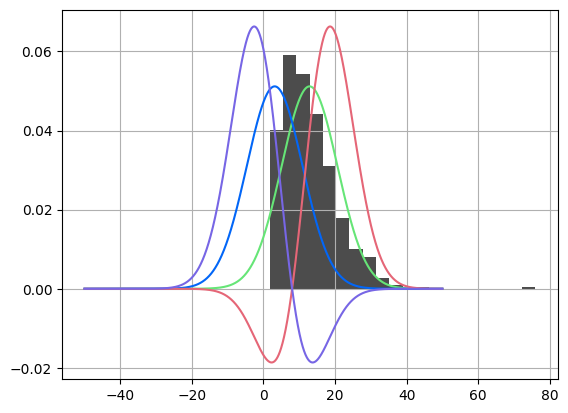

In [74]:
def BellCurve(X1,P1,P2):
  mean=P1
  SD=P2
  return (np.exp(-(1/2)*pow((X1-mean)/SD,2)))/(math.sqrt(np.pi*2)*SD)

name=df.columns[-2]
fig, ax = plt.subplots()

bins = 20
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black', 
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

#plt.axvline(dfmain[name].mean(),color='blue')

Xline=np.arange(-50,50,0.01)
p=BellCurve(  Xline,  df[name].mean() ,df[name].std()   )
q0=BellCurve(  Xline,  df[name].mean() ,df[name].std()   )
q1=BellCurve(  Xline,  3.1415926535    ,df[name].std()   )
q2=BellCurve(  Xline,  df[name].mean() ,3.1415926535     )
q3=BellCurve(  Xline,  df[name].std()  ,df[name].mean()  )
q4=BellCurve(  Xline,  3.1415926535    ,3.1415926535     )

qN=q1

ax.plot(Xline,p              ,color='#66E577') # GREEN
ax.plot(Xline,qN              ,color='#0266F7') # BLUE
ax.plot(Xline,p*np.log(p/qN)  ,color='#E56677') # RED
ax.plot(Xline,qN*np.log(qN/p)  ,color='#7766E5') # PURPLE

plt.grid()
plt.show()

**This code compare and plot the different between 2 probability function.**

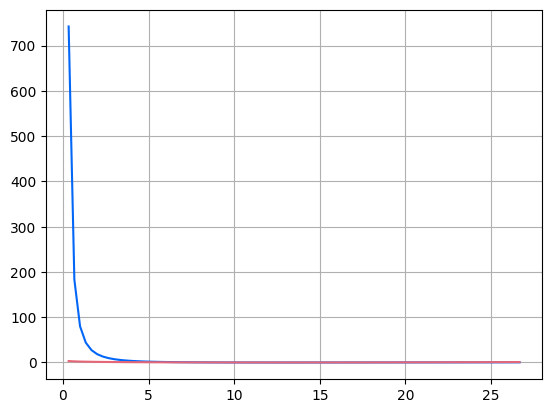

In [68]:
import scipy as sp
import sympy as smp 

def NormalDistribution(s,a,x):
  # s = Standard deviation
  # x = input
  # a = average value of input data
  return (smp.exp(-(((x-a)/s)**2)/2))/(s*(2*smp.pi)**(1/2))

x  = smp.symbols('x', real=True)
p  = NormalDistribution(df[name].mean() ,df[name].std() ,x)
lsyFo=[]
lsyRe=[]
lsx=[]
start=-3
stop=30
step=3
for i in range(stop*step):
  try:
    ii=start+i/step
    qi = NormalDistribution(ii ,df[name].std() ,x)
    lsyFo.append(float(smp.integrate(p*smp.log(p/qi), (x, -smp.oo, smp.oo))))
    lsyRe.append(float(smp.integrate(qi*smp.log(qi/p), (x, -smp.oo, smp.oo))))
    lsx.append(ii)
  except:
    continue

lsx=np.array(lsx)
lsyFo=np.array(lsyFo)
lsyRe=np.array(lsyRe)
fig, ax = plt.subplots()
ax.plot(lsx,lsyFo,color='#0266F7') # BLUE
ax.plot(lsx,lsyRe,color='#E56677') # RED 
plt.grid()
plt.show()

# reference: https://youtu.be/2I44Y9hfQ4Q

#Maximum Likelihood Estimation

###Introduction of Maximum Likelihood Estimation

**What is estimator**
* a rule for calculating an estimate of a given quantity based on observed data
* an equation for picking the “best,” or most likely accurate, data model based upon observations in realty.
* e.g. mean, variance etc.

**What is Maximum Likelihood Estimation?**
* It is a process of using data to find estimators for different parameters characterizing a distribution.

**Maximum Likelihood Estimation Formula**

$\hat{h}=\arg\min_{h\in D}\Pi P(h,x)$
* $\arg\min=$ return a value that closest to $0$
* $h=$ a parameter
* $\hat{h}=$ an approximated parameter (estimator)
* $P=$ probability distribution
* $D=$ set of all possible value of a dataset (input)

**Relationship between Maximum likelihood estimation and KL divergence**

$\lim_{h\to0}D^{KL}(P(h^*),P(h))=0$

KL divergence is used for comparing 2 different probability distributions. The closer KL divergence to 0, means both different probability distributions are similar to each other. We can use this algorithm to estimate the parameter of the distribution.

$\hat{h}=\arg\min_{h\in D}D^{KL}(P(h^*),P(h))$

* $\arg\min=$ return a value that closest to $0$
* $h=$ a parameter
* $\hat{h}=$ an approximated parameter (estimator)
* $h^*=$ true value of a parameter
* $P=$ probability distribution
* $D=$ set of all possible value of a dataset (input)
* $D^{KL}=$ KL divergence

Given that:
* $D^{KL}(P(h^*),P(h))=\int_{-\infty}^{\infty}P(h^*,x)\ln(\frac{P(h^*,x)}{P(h,x)})\,dx$
* $E(f,x)=\int_{-\infty}^{\infty}xf(x)\,dx$

$\therefore D^{KL}(P(h^*),P(h))=E(P(h^*),\ln(\frac{P(h^*,x)}{P(h,x)}))$

$D^{KL}(P(h^*),P(h))=E(P(h^*),\ln(P(h^*,x))-\ln(P(h,x)))$

$D^{KL}(P(h^*),P(h))=E(P(h^*),\ln(P(h^*,x)))-E(P(h^*),\ln(P(h,x)))$

$D^{KL}(P(h^*),P(h))=c-E(P(h^*),\ln(P(h,x))),\{c=E(P(h^*),\ln(P(h^*,x))),c\in\mathbb{R}\}$

Given that:
* $\lim_{n\to\infty}\frac{1}{n}\sum_{i=1}^nx^{\{i\}}\approx E(f,x)=\int_{-\infty}^{\infty}xf(x)\,dx$
* $E=$ expected value
* $f=$ weight (frequency) of a value
* $x^{\{i\}}=$ state of a value
* $\therefore\lim_{n\to\infty}\frac{1}{n}\sum_{i=1}^n\ln(P(h,x))\approx E(P(h^*),\ln(P(h,x)))=\int_{-\infty}^{\infty}\ln(P(h,x))P(h^*)\,dx$
* It is noteworthly that $f(x)$ and $P(h^*)$ are ignored because both are a basic property of data set $\vec{X}_n$

$D^{KL}(P(h^*),P(h))=c-\frac{1}{n}\sum_{i=1}^n\ln(P(h,x))$

$\therefore\hat{h}=\arg\min_{h\in D}c-\frac{1}{n}\sum_{i=1}^n\ln(P(h,x))$

$\hat{h}=\arg\min_{h\in D}\sum_{i=1}^n\ln(P(h,x))$

$\hat{h}=\arg\min_{h\in D}\ln(\Pi P(h,x))$

$\hat{h}=\arg\min_{h\in D}\Pi P(h,x)$

* $c,-\frac{1}{n} \text{ and} \ln$ are ignored because they do not affect the minimizer of the function.

###[UNFINISHED]: Implementation No.1, Apply Maximum Likelihood with finding normal distribution

**single variable normal distribution**

**multivariable normal distribution**

###[UNFINISHED]: Implementation No.2, Apply Maximum Likelihood with linear model

**Linear Regression**

**Binary Logistic Regression**

**Multinomial Logistic Regression**

#Other

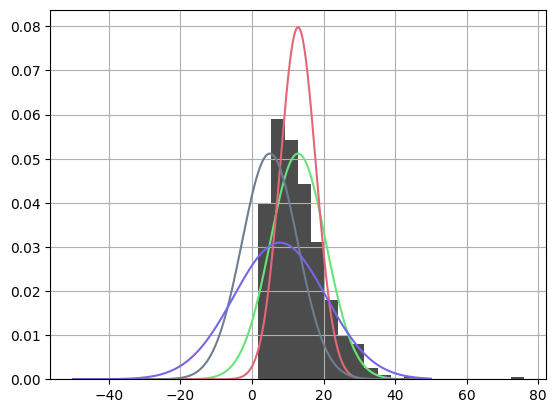

In [ ]:
'''
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans
  # Note:
  # StandardDeviation(x) = x.std()
'''

def BellCurve(X1,P1,P2):
  mean=P1
  SD=P2
  return (np.exp(-(1/2)*pow((X1-mean)/SD,2)))/(math.sqrt(np.pi*2)*SD)

name=df.columns[-2]
fig, ax = plt.subplots()

bins = 20
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black', 
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

#plt.axvline(dfmain[name].mean(),color='blue')

Xline=np.arange(-50,50,0.01)

ax.plot(Xline,BellCurve(Xline,df[name].mean(),df[name].std()),color='#66E577') # GREEN
ax.plot(Xline,BellCurve(Xline,df[name].mean(),5),color='#E56677') # RED
ax.plot(Xline,BellCurve(Xline,5,df[name].std()),color='#6E7E8E') # GRAY
ax.plot(Xline,BellCurve(Xline,df[name].std(),df[name].mean()),color='#7766E5') # Purple

plt.grid()
plt.show()

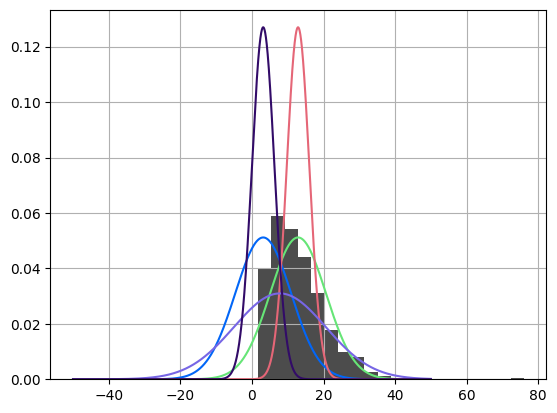

In [19]:
def BellCurve(X1,P1,P2):
  mean=P1
  SD=P2
  return (np.exp(-(1/2)*pow((X1-mean)/SD,2)))/(math.sqrt(np.pi*2)*SD)

name=df.columns[-2]
fig, ax = plt.subplots()

bins = 20
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black', 
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

#plt.axvline(dfmain[name].mean(),color='blue')

Xline=np.arange(-50,50,0.01)

#                         X    ,  mean()          ,std()             color
ax.plot(Xline,BellCurve(  Xline,  df[name].mean() ,df[name].std() )  ,color='#66E577') # GREEN
ax.plot(Xline,BellCurve(  Xline,  3.1415926535    ,df[name].std() )  ,color='#0266F7') # BLUE
ax.plot(Xline,BellCurve(  Xline,  df[name].mean() ,3.1415926535   )  ,color='#E56677') # RED
ax.plot(Xline,BellCurve(  Xline,  df[name].std()  ,df[name].mean())  ,color='#7766E5') # PURPLE
ax.plot(Xline,BellCurve(  Xline,  3.1415926535    ,3.1415926535   )  ,color='#320B68') # DARK PURPLE

plt.grid()
plt.show()